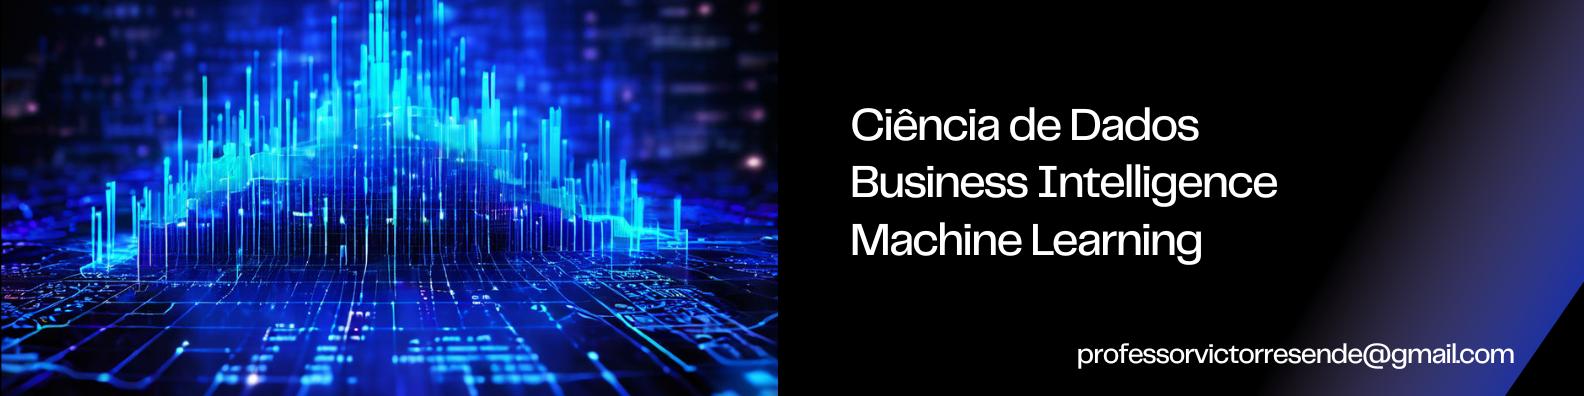

# **Mapa da Violência contra as Mulheres: homicídios por armas de fogo**
### **Victor Resende**
### 📊📈Projeto Independente

________


Este é um problema de análise sobre a violência contra as mulheres no Brasil.

Segundo o Comitê da [ONU](https://brasil.un.org/pt-br) (Organização das Nações Unidas), sobre os Direitos das Crianças:

"De acordo com o [Mapa da Violência](https://www.gov.br/mdh/pt-br/sdh/noticias/2015/maio/mapa-da-violencia-jovens-representam-mais-da-metade-das-mortes-por-armas-de-fogo), divulgado pelo Governo Federal em 2015, jovens entre 15 e 29 anos são as principais vítimas por armas de fogo no Brasil: no ano de 2012, por exemplo, 24.8882 pessoas nessa faixa etária morreram em decorrência de disparos de armas de fogo, o que corrensponde a 59% do número total de mortes causadas por esse motivo. Um relatório da ONU, elaborado em 2015 pelo Comitê para o Direito das Crianças, aponta que o Brasil apresenta umas das maiores taxas de homicídio infantil do mundo, sobretudo de jovens homens e negros. Afirma ainda que a vulnerabilidade de menores de baixa renda, socialmente marginalizados, está permitindo uma ampliação do número de crianças e também a violência policial, apontando que o alto número de execuções ilícitas por parte das polícias civil, militar e das milícias notavelmente se volta contra crianças moradoras de rua e de favelas durante operações militares e de "pacificação", entre outras".


A partir do exposto acima, partimos para entender a condição das mulheres nesse mesmo quadro de violência envolvendo armas de fogo.
  
Existem várias bases para análise da questão da violência no país, disponibilizado pelo [IPEA](https://www.ipea.gov.br/atlasviolencia/) (Instituto de Pesquisa Econômica Aplicada). Abaixo, as bases que foram utilizadas para este projeto:

1. Homicídios por armas de fogo.

Fonte: [🔗 Atlas da Violência – Taxa de Homicídio de Mulheres por Armas de Fogo](https://www.ipea.gov.br/atlasviolencia/filtros-series).

Nesse Dataset, temos uma série temporal que vai de 1989 a 2022. Nele, é possível verificar os homicídios de todos os estados brasileiros e suas respectivas cidades.

Desse modo, essa base possui os seguintes dados:

| Campo | Descrição | Tipo | 
|--------|-----------|------|
| cod | Código do município | Inteiro |
| nome | Nome do município | String |
| período | Período dos eventos | String |
| valor | Número de homicídios | Inteiro |
| uf | código Uf por estado | String |
| sigla_uf | Sigla de UF por estado | String |
| ano | Ano do evento | Inteiro |

______________

Esse projeto, então, se divide em 6 partes:

**1. Coleta e exploração dos dados:** aqui vamos explorar os dados de homicídios por arma de fogo nos estados e cidades brasileiras.

**2. Tratamento dos dados:** para remoção de missings, dados inconsistentes e/ou incompletos.

**3. Análise e visualiação dos dados:** para termos um panorama das principais cidades e estados com os dados sobre homicídios por armas de fogo. Comparando os dados, podemos extrair *insights* valiosos para pensar a questão da segurança das mulheres em nossa sociedade.

**4. *Insights* gerais:** nesse último tópico procuramos extrair o quadro atual da situação brasileira, em termos de segurança das mulheres, e quais desdobramentos podemos sugerir para futuros projetos que ajudem na criação e manutenção de um Brasil mais seguro e sem violência contra as mulheres.

**5. Análise para o estado de Minas Gerais:** por fim, fazemos uma análise comparativa com o estado de Minas Gerais, estado onde resido, atualmente.

**6. Predição dos dados**: o modelo aqui é univariado (apenas com as taxas de homicídio ao longo do tempo). Fazemos um exercício de previsão para discutir sobre o aumento ou diminuição, para a próxima década, dos níveis de homicídio, tomando o estado de Minas Gerais como base. Apontamos, no final, os trabalhos futuros com outras fontes de dados para uma maior explanação do tema.

_____


## Carregando as Bibliotecas Necessárias:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings("ignore")


_____


## 1. Coleta e Exploração dos Dados:

In [2]:
# Configurações de estilo:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# 1. Carregando os dados:

df = pd.read_csv(
    r"C:\Users\User\Documents\VHR\EBAC\Dados e Projetos\Mapa da Violência\homicidios-de-mulheres-por-armas-de-fogo.csv",
    sep=';'
)
df

,cod,nome,período,valor
0,5300108,Brasília,1989,5
1,5222302,Vila Propício,1989,0
2,5222203,Vila Boa,1989,0
3,5222054,Vicentinópolis,1989,0
4,5222005,Vianópolis,1989,0
...,...,...,...,...
190913,5222005,Vianópolis,2022,0
190914,5222054,Vicentinópolis,2022,0
190915,5222203,Vila Boa,2022,0
190916,5222302,Vila Propício,2022,0


In [14]:
#Tipos de dados:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190918 entries, 0 to 190917
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   cod       190918 non-null  int64 
 1   nome      190918 non-null  object
 2   período   190918 non-null  object
 3   valor     190918 non-null  int64 
 4   uf        190918 non-null  object
 5   sigla_uf  190918 non-null  object
 6   ano       190918 non-null  int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 9.5+ MB


In [17]:
# Alterando a configuração para mostrar todas as colunas:
pd.set_option('display.max_columns', None)

# Exibindo todas as colunas:
df


,cod,nome,período,valor,uf,sigla_uf,ano
0,5300108,Brasília,1989,5,53,DF,1989
1,5222302,Vila Propício,1989,0,52,GO,1989
2,5222203,Vila Boa,1989,0,52,GO,1989
3,5222054,Vicentinópolis,1989,0,52,GO,1989
4,5222005,Vianópolis,1989,0,52,GO,1989
...,...,...,...,...,...,...,...
190913,5222005,Vianópolis,2022,0,52,GO,2022
190914,5222054,Vicentinópolis,2022,0,52,GO,2022
190915,5222203,Vila Boa,2022,0,52,GO,2022
190916,5222302,Vila Propício,2022,0,52,GO,2022


_____


## 2. Tratamento dos Dados:

In [4]:
# 2.1 - Conversão segura da coluna 'valor':
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')

# 2.2 - Removendo registros com valores faltantes nas variáveis essenciais:
df = df.dropna(subset=['valor', 'cod', 'nome', 'período'])

# 2.3 - Conversão da coluna 'período' para string (caso esteja como número):
df['período'] = df['período'].astype(str)

# 2.4 - Criando coluna com a sigla da UF:
df['uf'] = df['cod'].astype(str).str[:2]

mapa_uf = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA', '16': 'AP', '17': 'TO',
    '21': 'MA', '22': 'PI', '23': 'CE', '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL',
    '28': 'SE', '29': 'BA', '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS', '50': 'MS', '51': 'MT', '52': 'GO', '53': 'DF'
}
df['sigla_uf'] = df['uf'].map(mapa_uf)


_____


## 3. Análise e Visualização dos dados:

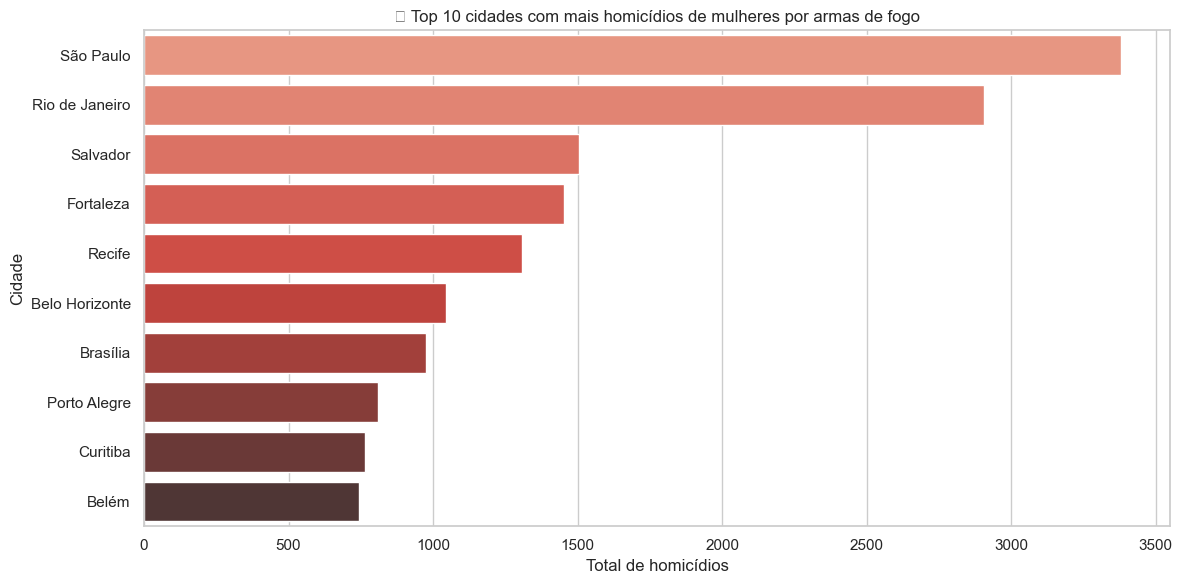


📍 Classificação das 10 cidades com mais homicídios:


,Cidade,Total de Homicídios,Classificação
0,São Paulo,3381,🔴 Alto
1,Rio de Janeiro,2907,🔴 Alto
2,Salvador,1505,🔴 Alto
3,Fortaleza,1453,🔴 Alto
4,Recife,1308,🔴 Alto
5,Belo Horizonte,1046,🔴 Alto
6,Brasília,976,🔴 Alto
7,Porto Alegre,810,🔴 Alto
8,Curitiba,763,🔴 Alto
9,Belém,745,🔴 Alto


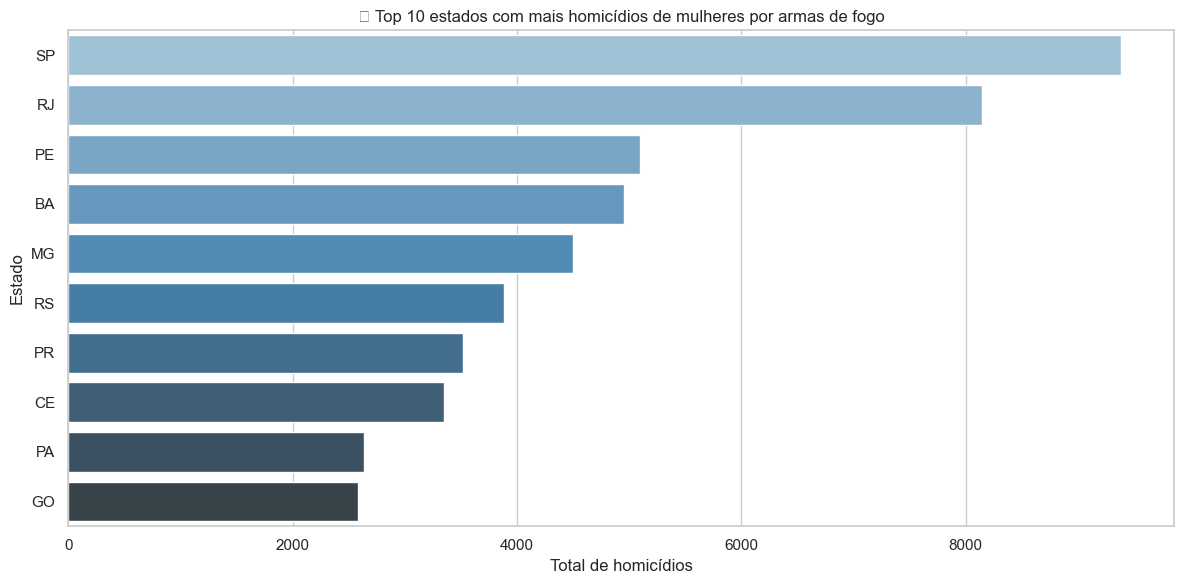


📍 Classificação dos 10 estados com mais homicídios:


,Estado,Total de Homicídios,Classificação
0,SP,9386,🔴 Alto
1,RJ,8142,🔴 Alto
2,PE,5100,🔴 Alto
3,BA,4955,🔴 Alto
4,MG,4500,🔴 Alto
5,RS,3881,🔴 Alto
6,PR,3517,🔴 Alto
7,CE,3353,🔴 Alto
8,PA,2638,🔴 Alto
9,GO,2585,🔴 Alto


In [5]:
# Função para classificar:
def classifica(valor):
    if valor < 100:
        return '🔵 Baixo'
    elif valor < 300:
        return '🟠 Médio'
    else:
        return '🔴 Alto'

# 3.1 - Top 10 cidades com mais homicídios:
top_cidades = df.groupby('nome')['valor'].sum().sort_values(ascending=False).head(10).reset_index()
top_cidades['classificacao'] = top_cidades['valor'].apply(classifica)

plt.figure()
sns.barplot(data=top_cidades, x='valor', y='nome', palette="Reds_d")
plt.title("🔴 Top 10 cidades com mais homicídios de mulheres por armas de fogo")
plt.xlabel("Total de homicídios")
plt.ylabel("Cidade")
plt.tight_layout()
plt.show()

# Tabela com classificação das cidades:
print("\n📍 Classificação das 10 cidades com mais homicídios:")
display(top_cidades.rename(columns={
    'nome': 'Cidade',
    'valor': 'Total de Homicídios',
    'classificacao': 'Classificação'
}))

# 3.2 - Top 10 estados com mais homicídios:
top_estados = df.groupby('sigla_uf')['valor'].sum().sort_values(ascending=False).head(10).reset_index()
top_estados['classificacao'] = top_estados['valor'].apply(classifica)

plt.figure()
sns.barplot(data=top_estados, x='valor', y='sigla_uf', palette="Blues_d")
plt.title("🔵 Top 10 estados com mais homicídios de mulheres por armas de fogo")
plt.xlabel("Total de homicídios")
plt.ylabel("Estado")
plt.tight_layout()
plt.show()

# Tabela com classificação dos estados:
print("\n📍 Classificação dos 10 estados com mais homicídios:")
display(top_estados.rename(columns={
    'sigla_uf': 'Estado',
    'valor': 'Total de Homicídios',
    'classificacao': 'Classificação'
}))


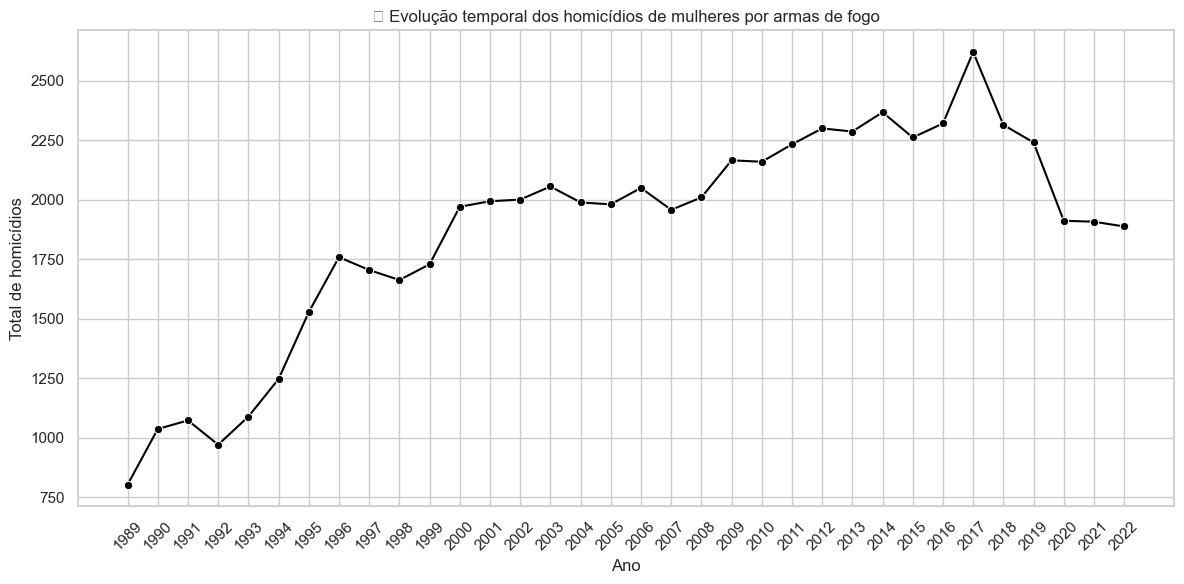


📍 Classificação dos anos por total de homicídios:


,Ano,Total de Homicídios,Classificação
0,1989,803,🔴 Alto
1,1990,1037,🔴 Alto
2,1991,1073,🔴 Alto
3,1992,971,🔴 Alto
4,1993,1089,🔴 Alto
5,1994,1247,🔴 Alto
6,1995,1528,🔴 Alto
7,1996,1759,🔴 Alto
8,1997,1705,🔴 Alto
9,1998,1663,🔴 Alto


In [6]:
# 3.3 - Evolução temporal dos homicídios:
df_total_ano = df.groupby('período')['valor'].sum().reset_index()
df_total_ano['classificacao'] = df_total_ano['valor'].apply(classifica)

plt.figure()
sns.lineplot(data=df_total_ano, x='período', y='valor', marker='o', color='black')
plt.title("📈 Evolução temporal dos homicídios de mulheres por armas de fogo")
plt.xlabel("Ano")
plt.ylabel("Total de homicídios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tabela com classificação dos anos:
print("\n📍 Classificação dos anos por total de homicídios:")
display(df_total_ano.rename(columns={
    'período': 'Ano',
    'valor': 'Total de Homicídios',
    'classificacao': 'Classificação'
}))


___________

## 4. Insights dos dados gerais:

#### 🔍 1. Concentração Geográfica

Cidades e estados com os maiores números de homicídios se concentram principalmente em regiões com grandes centros urbanos e histórico de violência, como BA, PE, RJ, SP e CE.

Algumas cidades específicas, apesar de não serem capitais, figuram entre os 10 municípios mais violentos, o que aponta focos locais de violência extrema.

→ Insight: Estratégias de enfrentamento devem considerar intervenções territoriais específicas e não apenas em capitais.
___________________
#### 📈 2. Evolução Temporal

A análise ano a ano mostra picos e quedas em determinados períodos. Isso pode estar relacionado a:

mudanças na política de segurança pública,

maior controle de armas,

alterações legislativas,

ou mesmo subnotificação.

→ Insight: Investigar políticas adotadas em anos de queda e seus efeitos pode fornecer boas práticas a serem replicadas.
__________
#### 📊 3. Disparidade Interna nos Estados

O boxplot revelou que há alta variação de homicídios dentro de um mesmo estado, com municípios apresentando valores muito superiores à média.

→ Insight: As políticas estaduais precisam ser personalizadas por município. Um plano único para o estado pode ser ineficiente se ignorar essas desigualdades internas.
_____
#### 🚨 4. Estados Críticos

Estados como Bahia, Pernambuco e Ceará frequentemente aparecem nas primeiras posições.

Isso pode estar relacionado a:

presença de facções,

falta de estrutura policial ou judiciária,

ou falhas nos programas de proteção à mulher.

→ Insight: Estados críticos devem receber prioridade em políticas públicas, financiamento e monitoramento nacional.
____
#### 📉 5. Municípios com Queda Acentuada

Alguns municípios apresentaram queda significativa ao longo dos anos, o que merece destaque.

→ Insight: Analisar os fatores locais que contribuíram para a queda pode servir como modelo para replicar em outras regiões.
__________
#### 👩‍👧‍👦 6. Políticas Públicas

Os dados evidenciam que o problema não é apenas criminal, mas social.

A presença de homicídios femininos por arma de fogo pode estar associada a violência doméstica agravada, acesso a armas, e falhas no sistema de proteção às vítimas.

→ Insight: Os resultados reforçam a importância de ações integradas: educação, proteção social, justiça e saúde pública.




___________

## 5. Análise comparativa para o estado de Minas Gerais:

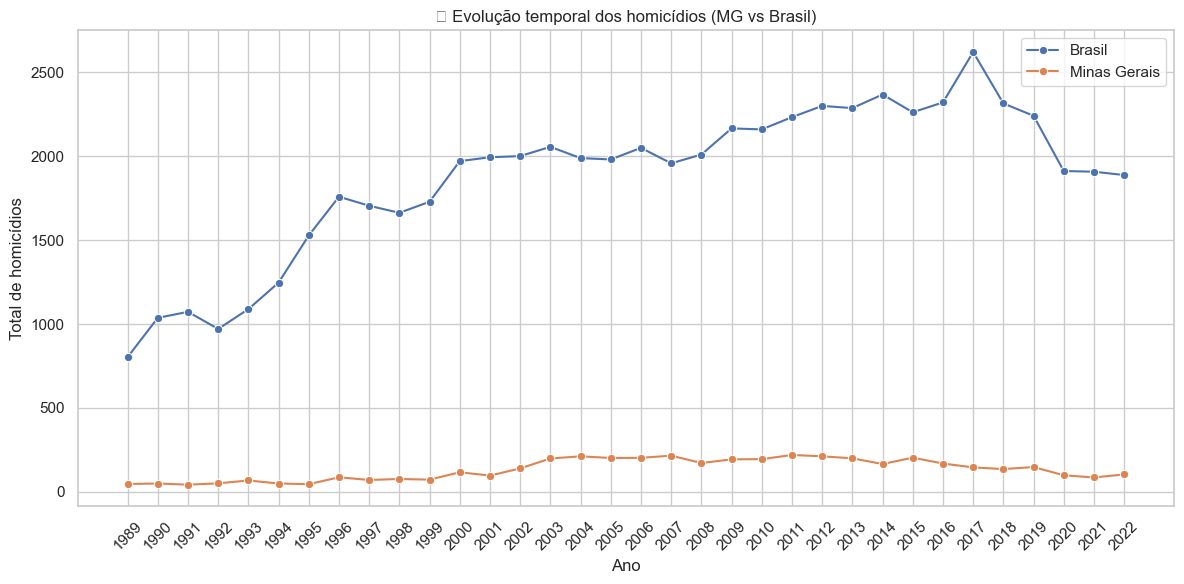

In [7]:
df_mg = df[df['sigla_uf'] == 'MG']

# 1. Evolução temporal em MG comparada ao Brasil:
df_mg_ano = df_mg.groupby('período')['valor'].sum().reset_index()
df_total_ano = df.groupby('período')['valor'].sum().reset_index()

plt.figure()
sns.lineplot(data=df_total_ano, x='período', y='valor', label='Brasil', marker='o')
sns.lineplot(data=df_mg_ano, x='período', y='valor', label='Minas Gerais', marker='o')
plt.title("📊 Evolução temporal dos homicídios (MG vs Brasil)")
plt.xlabel("Ano")
plt.ylabel("Total de homicídios")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


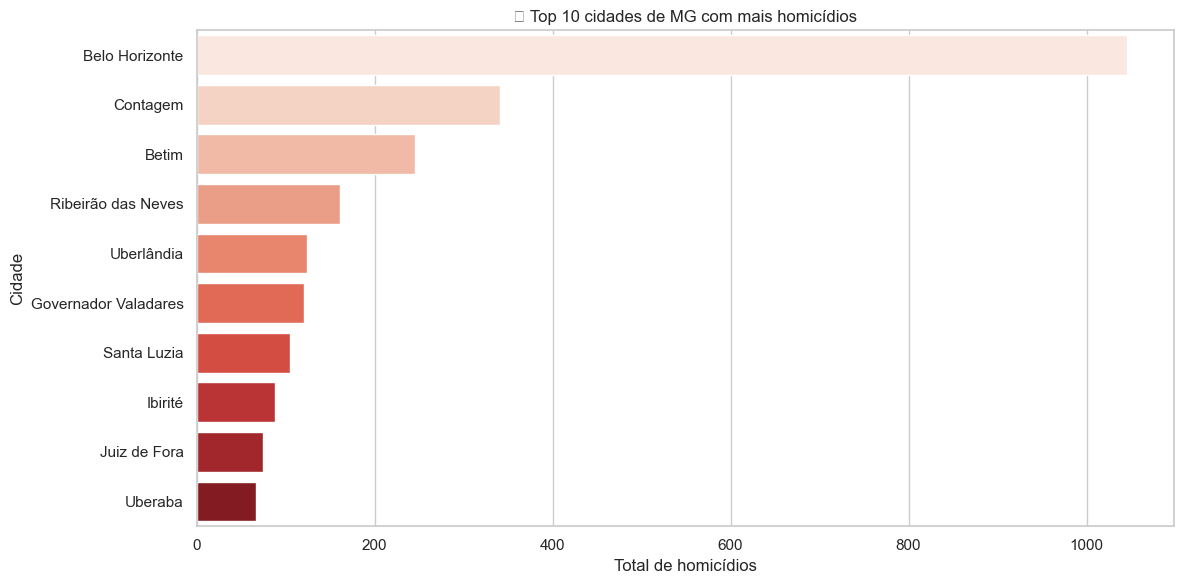


📍 Classificação das cidades com mais homicídios em MG:


,Cidade,Total de Homicídios,Classificação
0,Belo Horizonte,1046,🔴 Alto
1,Contagem,341,🔴 Alto
2,Betim,245,🟠 Médio
3,Ribeirão das Neves,161,🟠 Médio
4,Uberlândia,124,🟠 Médio
5,Governador Valadares,120,🟠 Médio
6,Santa Luzia,105,🟠 Médio
7,Ibirité,88,🔵 Baixo
8,Juiz de Fora,75,🔵 Baixo
9,Uberaba,67,🔵 Baixo


In [8]:
top_cidades_mg = df_mg.groupby('nome')['valor'].sum().sort_values(ascending=False).head(10).reset_index()
top_cidades_mg['classificacao'] = top_cidades_mg['valor'].apply(classifica)

plt.figure()
sns.barplot(data=top_cidades_mg, x='valor', y='nome', palette="Reds")
plt.title("🔴 Top 10 cidades de MG com mais homicídios")
plt.xlabel("Total de homicídios")
plt.ylabel("Cidade")
plt.tight_layout()
plt.show()

print("\n📍 Classificação das cidades com mais homicídios em MG:")
display(top_cidades_mg.rename(columns={
    'nome': 'Cidade',
    'valor': 'Total de Homicídios',
    'classificacao': 'Classificação'
}))


In [9]:
total_mg = df_mg['valor'].sum()
total_brasil = df['valor'].sum()
percentual_mg = (total_mg / total_brasil) * 100

print(f"🔎 Minas Gerais teve um total de {total_mg:.0f} homicídios de mulheres por armas de fogo.")
print(f"📌 Isso representa {percentual_mg:.2f}% do total registrado no Brasil.")

ano_mais_violento = df_mg_ano.loc[df_mg_ano['valor'].idxmax()]
print(f"📈 O ano com mais homicídios em MG foi {ano_mais_violento['período']} com {ano_mais_violento['valor']} casos.")

cidade_top = top_cidades_mg.iloc[0]
print(f"🏙️ A cidade mais violenta foi {cidade_top['nome']}, com {cidade_top['valor']} homicídios no total.")


🔎 Minas Gerais teve um total de 4500 homicídios de mulheres por armas de fogo.
📌 Isso representa 7.08% do total registrado no Brasil.
📈 O ano com mais homicídios em MG foi 2011 com 220 casos.
🏙️ A cidade mais violenta foi Belo Horizonte, com 1046 homicídios no total.


________

## 6. Análise preditiva:

### ✅ Por que uma análise preditiva e o que pode agregar:

- Tendência futura: Saber se os homicídios tendem a aumentar ou diminuir nos próximos anos pode ajudar órgãos públicos e ONGs a tomar decisões preventivas.

- Alocação de recursos: Prever aumento em certas regiões pode justificar o direcionamento de mais políticas públicas e segurança.

- Análise regional e temporal: É possível fazer previsões por estado ou cidade, o que traz um nível de granularidade muito útil para ações locais.



#### ⚙️ Exemplo de linha do tempo para Minas Gerais:

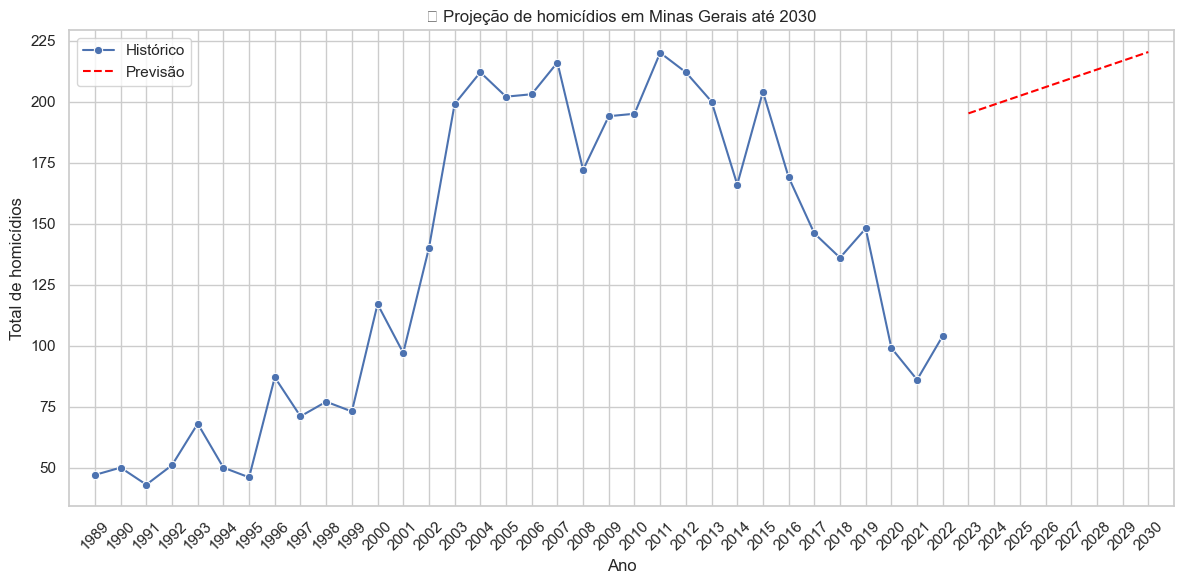

In [10]:
# Preparando os dados:
df_mg_ano['ano_num'] = df_mg_ano['período'].astype(int)
X = df_mg_ano[['ano_num']]
y = df_mg_ano['valor']

# Ajustando modelo:
modelo = LinearRegression()
modelo.fit(X, y)

# Previsão até 2030:
anos_futuros = pd.DataFrame({'ano_num': range(df_mg_ano['ano_num'].max() + 1, 2031)})
anos_futuros['previsao'] = modelo.predict(anos_futuros)

# Plot:
plt.figure()
sns.lineplot(data=df_mg_ano, x='ano_num', y='valor', label='Histórico', marker='o')
sns.lineplot(data=anos_futuros, x='ano_num', y='previsao', label='Previsão', linestyle='--', color='red')

# Título e rótulos:
plt.title("📈 Projeção de homicídios em Minas Gerais até 2030")
plt.xlabel("Ano")
plt.ylabel("Total de homicídios")

# Ajustando os xticks para uma visualização mais limpa:
xticks = list(df_mg_ano['ano_num']) + anos_futuros['ano_num'].tolist()
plt.xticks(xticks, rotation=45)  # Rotacionando para melhor visualização
plt.xlim(df_mg_ano['ano_num'].min() - 1, anos_futuros['ano_num'].max() + 1)  # Garantir que o gráfico não "encavalhe"

plt.tight_layout()
plt.show()


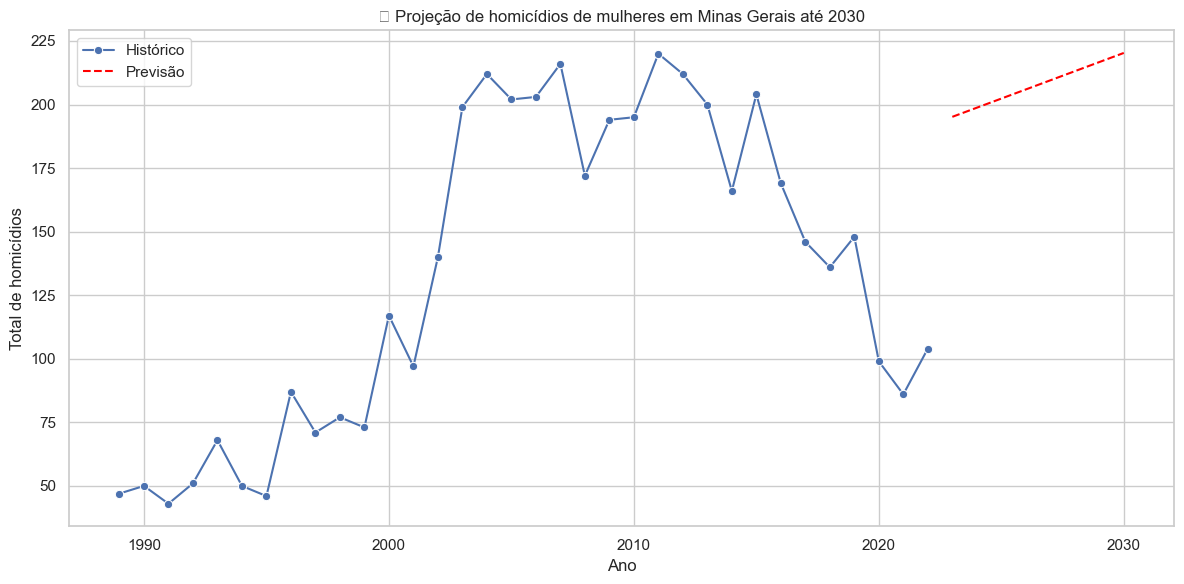

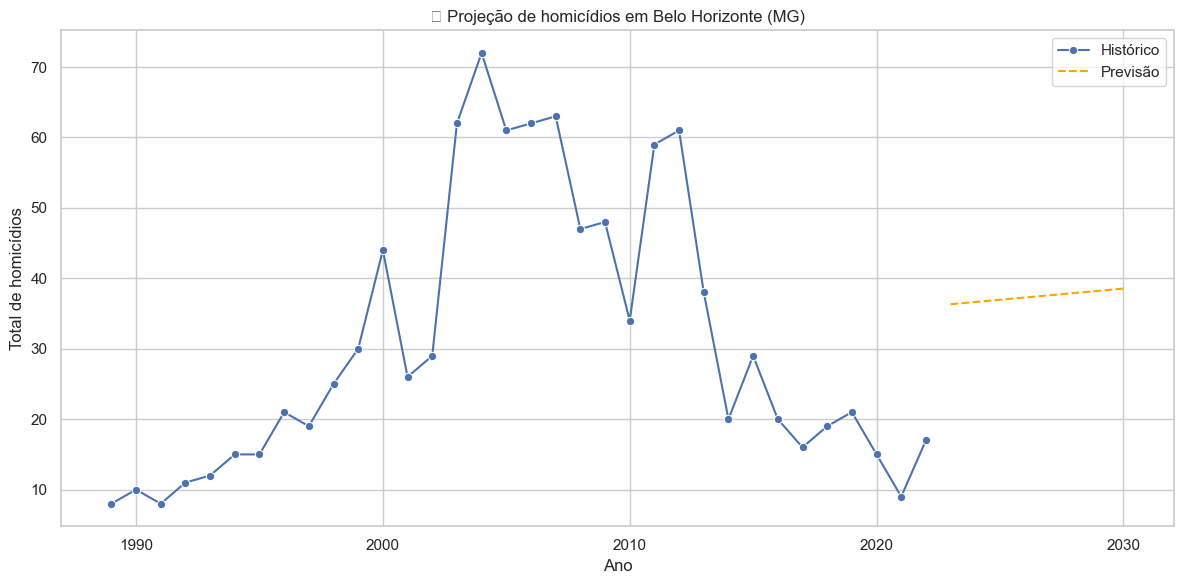

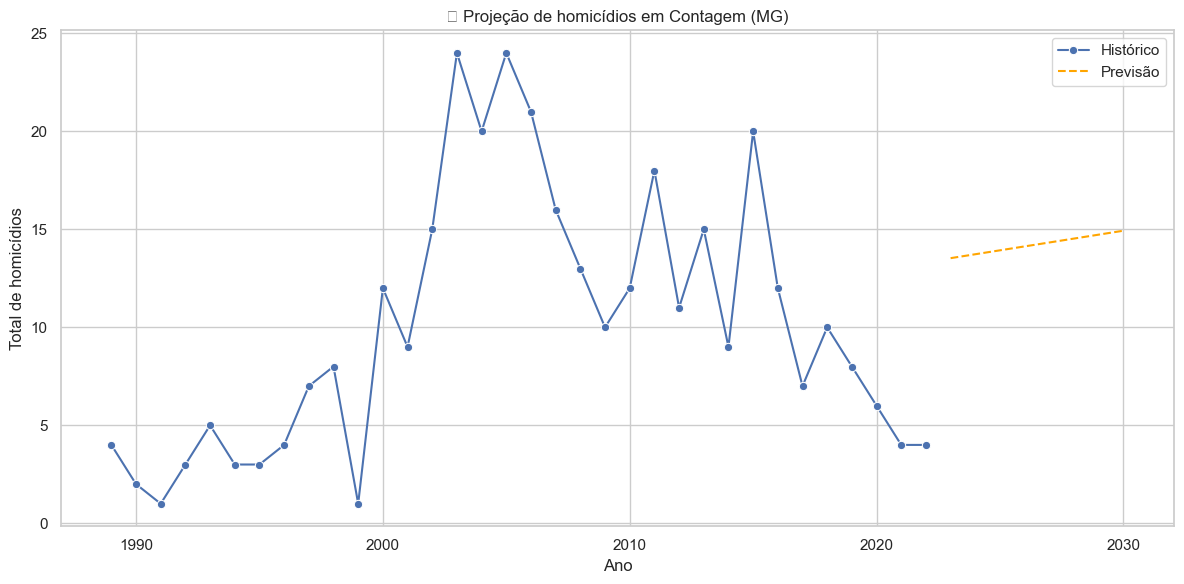

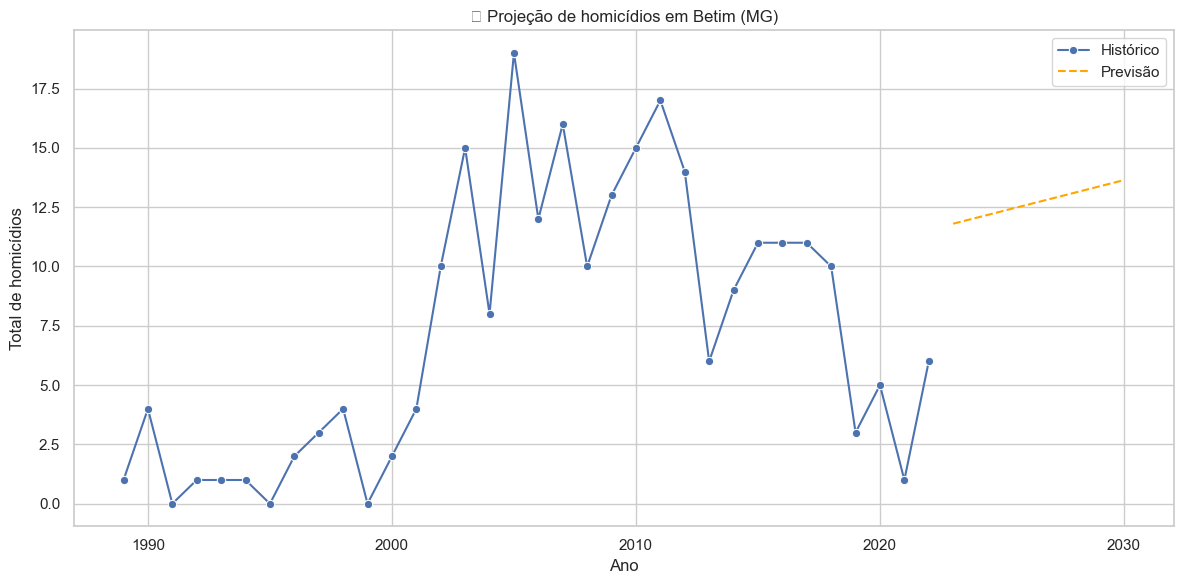

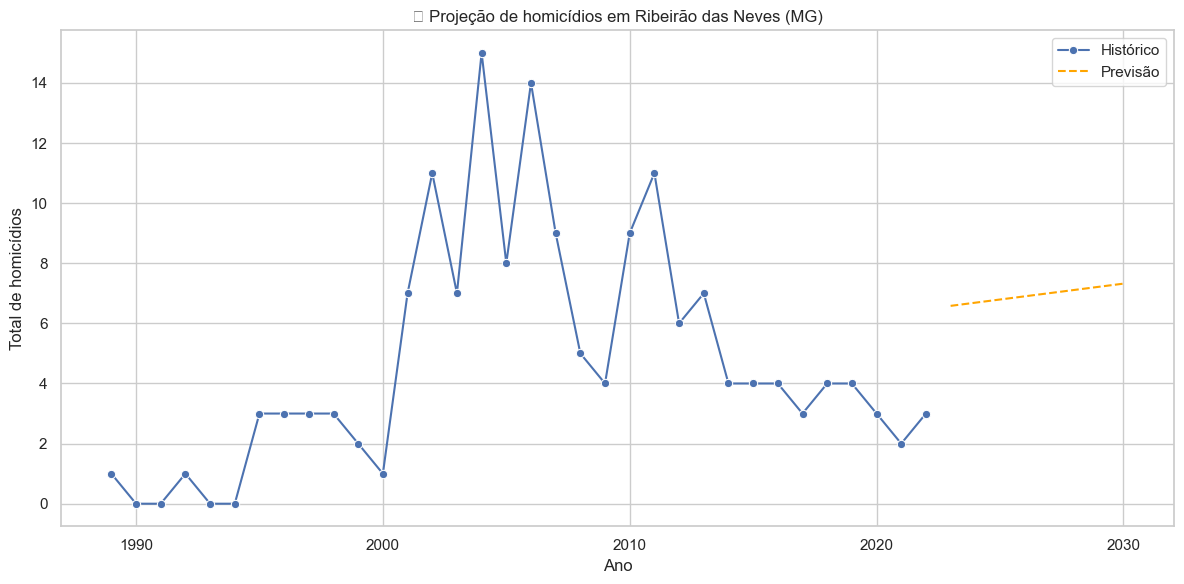

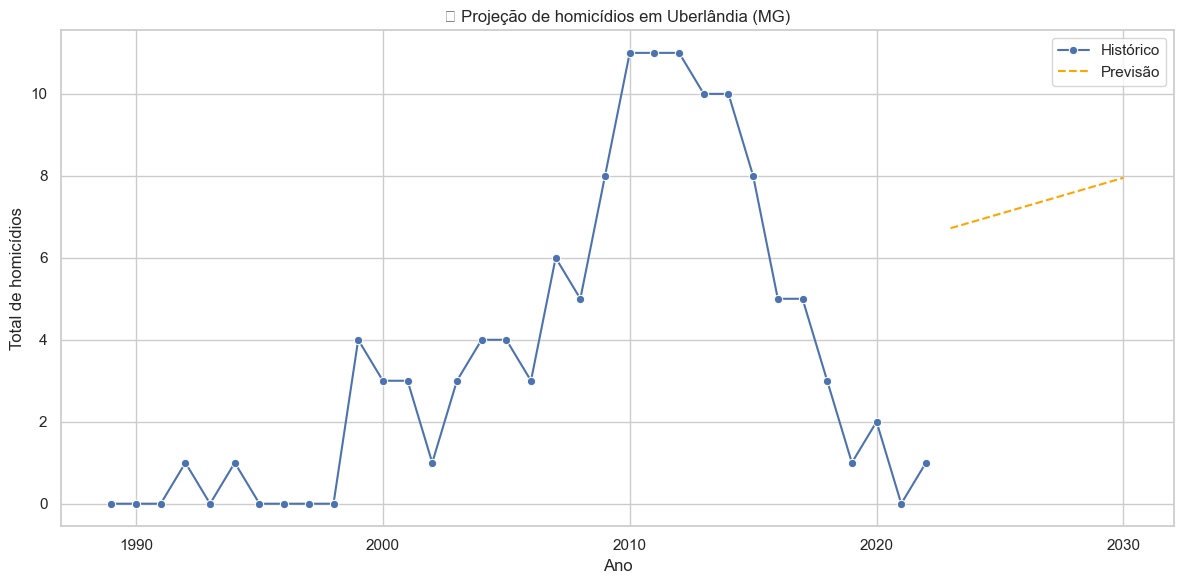

In [11]:
# Criando variável numérica de ano:
df['ano'] = df['período'].astype(int)

# 1. Previsão para Minas Gerais:

df_mg = df[df['sigla_uf'] == 'MG']
df_mg_ano = df_mg.groupby('ano')['valor'].sum().reset_index()

X_mg = df_mg_ano[['ano']]
y_mg = df_mg_ano['valor']

modelo_mg = LinearRegression()
modelo_mg.fit(X_mg, y_mg)

anos_futuros = pd.DataFrame({'ano': range(df_mg_ano['ano'].max() + 1, 2031)})
anos_futuros['previsao'] = modelo_mg.predict(anos_futuros)

# Plot:
plt.figure()
sns.lineplot(data=df_mg_ano, x='ano', y='valor', marker='o', label='Histórico')
sns.lineplot(data=anos_futuros, x='ano', y='previsao', linestyle='--', color='red', label='Previsão')
plt.title("📈 Projeção de homicídios de mulheres em Minas Gerais até 2030")
plt.xlabel("Ano")
plt.ylabel("Total de homicídios")
plt.tight_layout()
plt.show()

# 2. Previsão para 5 cidades com mais homicídios em MG:

top_cidades_mg = df_mg.groupby('nome')['valor'].sum().sort_values(ascending=False).head(5).index.tolist()

for cidade in top_cidades_mg:
    df_cidade = df_mg[df_mg['nome'] == cidade].groupby('ano')['valor'].sum().reset_index()

    X_cidade = df_cidade[['ano']]
    y_cidade = df_cidade['valor']

    modelo_cidade = LinearRegression()
    modelo_cidade.fit(X_cidade, y_cidade)

    anos_futuros_cidade = pd.DataFrame({'ano': range(df_cidade['ano'].max() + 1, 2031)})
    anos_futuros_cidade['previsao'] = modelo_cidade.predict(anos_futuros_cidade)

    plt.figure()
    sns.lineplot(data=df_cidade, x='ano', y='valor', marker='o', label='Histórico')
    sns.lineplot(data=anos_futuros_cidade, x='ano', y='previsao', linestyle='--', color='orange', label='Previsão')
    plt.title(f"📈 Projeção de homicídios em {cidade} (MG)")
    plt.xlabel("Ano")
    plt.ylabel("Total de homicídios")
    plt.tight_layout()
    plt.show()


____________

### 💡 Alguns insights:

Embora trabalhamos aqui com univariadas, temos uma projeção de como as taxas de homicídio nas Minas Gerais, por exemplo, tendem a aumentar. O que nos gera os seguintes insights, para o caso de Minas Gerais, e que devem ser pensados para outros estados brasileiros:


#### 1. Tendência de Crescimento ou Diminuição

**Observação:** A linha histórica de homicídios ao longo dos anos mostra a evolução da taxa de homicídios, e a linha de previsão até 2030 revela a tendência futura.

**Insight:** observamos que a previsão mostra uma tendência crescente, isso pode indicar a necessidade de reforçar políticas públicas de segurança.

#### 2. Identificação de Padrões Temporais

**Observação:** Ao observar o comportamento da linha histórica, é possível verificar se há anos com picos de homicídios e, em seguida, uma queda. Esses padrões podem estar associados a eventos específicos, como mudanças políticas, operações de segurança, crises econômicas, entre outros fatores.

**Insight:** analisar o ano em que ocorre o pico ou a queda significativa pode oferecer dados valiosos para explicar esses eventos. Isso pode ajudar a direcionar políticas públicas para áreas específicas ou estratégias de segurança.

#### 3. Previsão de Riscos para o Futuro

**Observação:** A previsão até 2030 pode fornecer um cenário de risco a ser monitorado.

**Insight:** se a projeção indica um aumento constante ou abrupto, seria crucial antecipar políticas públicas para combater esse crescimento, incluindo aumento de policiamento, investimentos em prevenção de crimes, programas sociais, ou mais treinamentos para as forças de segurança.

#### 4. Impacto de Intervenções

**Observação:** Se a linha de previsão for feita após uma intervenção ou mudança significativa (por exemplo, uma grande operação de segurança), a comparação entre a previsão antes e depois da intervenção pode mostrar se essa ação teve um impacto positivo na redução de homicídios.

**Insight:** isso pode ajudar a validar o impacto de políticas públicas e orientar futuras ações de segurança.

#### 5. Planejamento e Alocação de Recursos

**Observação:** O aumento ou diminuição projetada de homicídios pode indicar a necessidade de alocar recursos de forma mais eficiente, seja em policiamento, serviços de apoio à vítima, programas de prevenção de crimes ou apoio a famílias.

**Insight:** um crescimento nas previsões pode justificar um aumento no orçamento para segurança pública, enquanto uma diminuição pode permitir redirecionamento de recursos para outras áreas sociais.

#### 6. Comparações Regionais

**Observação:** Esse modelo de previsão poderia ser replicado para outras regiões ou estados do Brasil, permitindo comparações regionais.

**Insight:** se Minas Gerais está apresentando uma diminuição nas taxas de homicídios, isso pode servir de exemplo ou modelo para outras regiões com problemas semelhantes. Ou, se o estado estiver aumentando, isso pode indicar que políticas em outras regiões são mais eficazes.

#### 7. Tomada de Decisões Proativas

**Observação:** A previsão até 2030 não apenas indica o que pode acontecer, mas também permite que as autoridades se antecipem e tomem decisões informadas.

**Insight:** a utilização de modelos preditivos pode servir como uma ferramenta para planejamento estratégico, permitindo ajustes em políticas públicas e ações de segurança antes que o problema se agrave.

#### 8. Relação com Outros Fatores Sociais e Econômicos

**Observação:** a variação nos homicídios pode estar correlacionada com fatores socioeconômicos, como desemprego, desigualdade, acesso a educação, entre outros.

**Insight:** ao realizar uma análise mais profunda de variáveis adicionais, podemos encontrar fatores correlacionados e melhorar o entendimento sobre as causas dos homicídios, o que permitiria direcionar políticas públicas mais eficazes.

Nesse caso, podemos pensar para projetos futuros o trabalho com fontes externas relevantes para essas correlações:


**1. Políticas de Segurança Pública**

🔎Fontes de dados:

🗂️ Secretarias de Segurança Pública (SSP): Muitos estados brasileiros, incluindo Minas Gerais, publicam relatórios anuais sobre a eficácia das suas políticas de segurança pública.

🗂️ Instituto de Pesquisa Econômica Aplicada (IPEA): Oferece dados sobre políticas públicas e segurança.

🗂️ Observatório de Segurança Pública: Algumas organizações, como o Fórum Brasileiro de Segurança Pública, coletam dados sobre ações e impactos de políticas de segurança.

🗂️ DataSUS: O Sistema de Informações sobre Mortalidade do SUS pode fornecer dados sobre violência e políticas de saúde pública associadas.

Como usar no modelo: Pode-se adicionar variáveis como a intensidade e a quantidade de operações de segurança, investimentos em segurança pública, ou eventos específicos como a criação de novos programas de segurança.

**2. Taxa de Desemprego**

🔎Fontes de dados:

🗂️ Instituto Brasileiro de Geografia e Estatística (IBGE): Publica os dados do desemprego através da Pesquisa Nacional por Amostra de Domicílios (PNAD).

🗂️ Instituto de Pesquisa Econômica Aplicada (IPEA): Também oferece dados detalhados sobre o desemprego e suas variações.

🗂️ Fundação Getúlio Vargas (FGV): Produz índices e relatórios sobre o mercado de trabalho no Brasil, incluindo dados sobre o desemprego.

Como usar no modelo: A taxa de desemprego pode ser uma variável importante, pois, geralmente, um aumento no desemprego está associado ao aumento de crimes. Pode-se criar uma variável que indique a taxa de desemprego em Minas Gerais para cada ano.

**3. Desigualdade Social (Índice de Gini)**

🔎Fontes de dados:

🗂️ IBGE: O IBGE publica dados de desigualdade, incluindo o Índice de Gini, que mede a distribuição de renda no Brasil.

🗂️ IPEA: O IPEA também disponibiliza informações detalhadas sobre desigualdade de renda e riqueza.

🗂️ Atlas da Violência (Instituto de Pesquisa Econômica Aplicada – IPEA e Fórum Brasileiro de Segurança Pública): Publica anualmente o Atlas da Violência, que traz informações sobre desigualdade social e violência no Brasil.

Como usar no modelo: A desigualdade social é um dos principais fatores que influenciam o crime. Ao incluir o índice de Gini para cada ano ou cada cidade/estado, é possível capturar a relação entre desigualdade e homicídios.


_____________


📊 **by Victor Resende**